### Student Information
Name: 徐偉晉

Student ID: 109022127

GitHub ID: Wayne48763

Kaggle name: WayneHsu123

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

## Environment Setup

In [1]:
### Begin Assignment Here
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(torch.cuda.is_available())

True


## Load Data

In [3]:
# load data from pickle file
df_train = pd.read_pickle('./data/train.pkl')
df_test = pd.read_pickle('./data/test.pkl')

In [4]:
df_train.head()

,tweet_id,hashtags,text,identification,emotion,text_clean
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",train,anticipation,"People post ""add #Snapchat"" must dehydrated. C..."
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",train,sadness,"@brianklaas As see, Trump dangerous #freepress..."
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,Now ISSA stalking Tasha 😂😂😂 <LH>
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy,@RISKshow @TheKevinAllison Thx BEST TIME tonig...
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,train,anticipation,Still waiting supplies Liscus. <LH>


In [5]:
# print max length of sentences
print('max length of sentences: ', df_train['text'].str.len().max())

max length of sentences:  202


## Data Preprocessing

In [6]:
from transformers import RobertaTokenizerFast
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

/cluster/home/WayneHsu/DM2023-Lab2-Master/datamining/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
tokenizer = RobertaTokenizerFast.from_pretrained('cardiffnlp/twitter-roberta-base-emotion-latest')

In [8]:
# build one hot encoder
ohe = OneHotEncoder(sparse_output=True)
ohe.fit(df_train[['emotion']])
print(ohe.categories_)

[array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness',
       'surprise', 'trust'], dtype=object)]


In [9]:
df_train['label'] = ohe.transform(df_train[['emotion']]).toarray().tolist()
df_test['label'] = 0

In [10]:
df_train.head()

,tweet_id,hashtags,text,identification,emotion,text_clean,label
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",train,anticipation,"People post ""add #Snapchat"" must dehydrated. C...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",train,sadness,"@brianklaas As see, Trump dangerous #freepress...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear,Now ISSA stalking Tasha 😂😂😂 <LH>,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy,@RISKshow @TheKevinAllison Thx BEST TIME tonig...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,train,anticipation,Still waiting supplies Liscus. <LH>,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [11]:
# build dataset
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.metrics import f1_score
import gc

class TweetDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=160):
        self.df = df
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['label']
        encoding = self.tokenizer(text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors='pt')
        id = self.df.iloc[idx]['tweet_id']
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.float),
            'id': id
        }
    


In [24]:
# train test split
dataset = TweetDataset(df_train, tokenizer, max_len=160)
train_dataset, val_dataset = train_test_split(dataset, test_size=0.1, random_state=42)
dataset = None

In [26]:
print('train dataset size: ', len(train_dataset))
print('val dataset size: ', len(val_dataset))

train dataset size:  1310006
val dataset size:  145557


In [27]:
# build dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

## Model

In [28]:
from transformers import RobertaForSequenceClassification

In [29]:
model = RobertaForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-emotion-latest', num_labels=8)

config.json: 100%|██████████| 1.21k/1.21k [00:00<00:00, 8.87MB/s]
pytorch_model.bin: 100%|██████████| 499M/499M [00:19<00:00, 26.1MB/s] 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion-latest and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

In [31]:
EPOCHS = 3

In [32]:
# train model
model.cuda()
model.train()
train_losses = []
val_losses = []
train_accs = []
val_accs = []
train_f1s = []
val_f1s = []

for epoch in range(EPOCHS):
    train_loss = 0
    train_acc = 0
    train_f1 = 0
    val_loss = 0
    val_acc = 0
    val_f1 = 0
    
    model.train()
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].cuda().squeeze()
        attention_mask = batch['attention_mask'].cuda()
        labels = batch['label'].cuda()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += (outputs[1].argmax(1) == labels.argmax(1)).sum().item()
        train_f1 += f1_score(labels.cpu().numpy().argmax(1), outputs[1].argmax(1).cpu().numpy(), average='macro')
        
    model.eval()
    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].cuda().squeeze()
            attention_mask = batch['attention_mask'].cuda()
            labels = batch['label'].cuda()

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs[0]

            val_loss += loss.item()
            val_acc += (outputs[1].argmax(1) == labels.argmax(1)).sum().item()
            val_f1 += f1_score(labels.cpu().numpy().argmax(1), outputs[1].argmax(1).cpu().numpy(), average='macro')
    
    train_loss /= len(train_loader)
    train_acc /= len(train_dataset)
    train_f1 /= len(train_loader)
    val_loss /= len(val_loader)
    val_acc /= len(val_dataset)
    val_f1 /= len(val_loader)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    train_f1s.append(train_f1)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    val_f1s.append(val_f1)

    print('Epoch: ', epoch+1)
    print('Train loss: ', train_loss)
    print('Train acc: ', train_acc)
    print('Train f1: ', train_f1)
    print('Val loss: ', val_loss)
    print('Val acc: ', val_acc)
    print('Val f1: ', val_f1)
    torch.save(model, f'./model/roberta_{epoch+1}.pt')

100%|██████████| 4549/4549 [05:11<00:00, 14.63it/s]


Epoch:  1
Train loss:  0.19653879827042867
Train acc:  0.6451901747014899
Train f1:  0.5165957955586777
Val loss:  0.18104446288890225
Val acc:  0.6732276702597608
Val f1:  0.5576815362832624


100%|██████████| 4549/4549 [05:11<00:00, 14.62it/s]


Epoch:  2
Train loss:  0.17285476520044574
Train acc:  0.6909037057845536
Train f1:  0.5719156238630374
Val loss:  0.1757557378411555
Val acc:  0.6859855589219344
Val f1:  0.5704153713246387


100%|██████████| 4549/4549 [05:11<00:00, 14.58it/s]


Epoch:  3
Train loss:  0.15987203644527712
Train acc:  0.7166852670903797
Train f1:  0.602816442436106
Val loss:  0.17865503716548084
Val acc:  0.6897847578611815
Val f1:  0.57399114792528


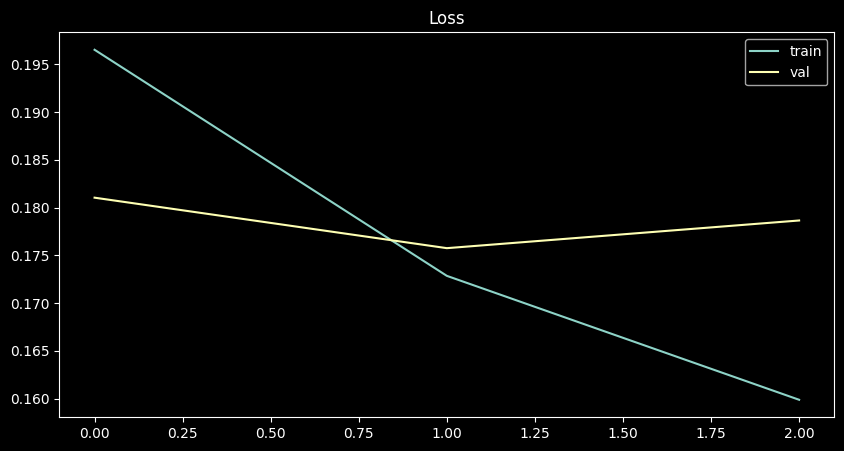

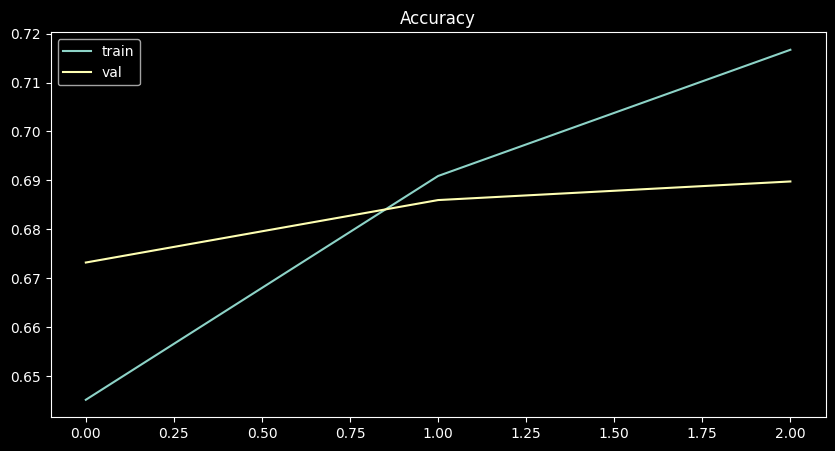

In [33]:
# plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.title('Loss')
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Accuracy')
plt.plot(train_accs, label='train')
plt.plot(val_accs, label='val')
plt.legend()
plt.show()

## Predict Test Data

In [35]:
model = torch.load('./model/roberta_3.pt')
model.cuda()
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [36]:
# build test dataset
test_dataset = TweetDataset(df_test, tokenizer, max_len=160)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [37]:
preds = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].cuda().squeeze()
        attention_mask = batch['attention_mask'].cuda()

        outputs = model(input_ids, attention_mask=attention_mask)
        
        labels = ohe.inverse_transform(outputs[0].cpu().numpy())
        
        for id, label in zip(batch['id'], labels):
            preds.append([id, label[0]])
    

100%|██████████| 12875/12875 [19:05<00:00, 11.24it/s]


In [38]:
# output result
df = pd.DataFrame(preds, columns=['id', 'emotion'])
print(df.shape)
df.to_csv('roberta_result.csv', index=False)

(411972, 2)
